# Image Classification of Handwritten Numeric Digits using TensorFlow

In this notebook, we create a artificial neural network model to predict the number that is present in an image that contains the number written in free hand. Here we use Convolutional Neural Network architecture to train the images. The images used for trained are from MNIST dataset. 

The MNIST dataset comprises 60,000 training examples and 10,000 test examples of the handwritten digits 0–9, formatted as 28x28-pixel monochrome images.


![MNIST Data set](https://blog.webkid.io/content/images/old/datasets-for-machine-learning/mnist.png)

### Import the tensorflow library

In [5]:
import tensorflow as tf

/usr/local/src/conda3_runtime/home/envs/DSX-Python35-Spark/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### Import training data

In [ ]:
MNIST data can be downloaded using "mnist" module in 

In [6]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


### Neural Network Layout of the model

![Neural Network for the model](http://solarisailab.com/wp-content/uploads/2017/05/CNNs_For_MNIST.png)

Ref.: http://solarisailab.com/wp-content/uploads/2017/05/CNNs_For_MNIST.png

### Configure parameters

In [9]:
# Network Parameters
n_input = 784 
n_classes = 10 
dropout = 0.75 

### Define Input variables

In [10]:
# tf Graph input
x = tf.placeholder(tf.float32, [None, n_input], name="x_input")
y = tf.placeholder(tf.float32, [None, n_classes])

### Define Weights and biases

In [11]:
# Store layers weight & bias
weights = {
    # 5x5 conv, 1 input, 32 outputs
    'wc1': tf.Variable(tf.random_normal([5, 5, 1, 32])),
    # 5x5 conv, 32 inputs, 64 outputs
    'wc2': tf.Variable(tf.random_normal([5, 5, 32, 64])),
    # fully connected, 7*7*64 inputs, 1024 outputs
    'wd1': tf.Variable(tf.random_normal([7*7*64, 1024])),
    # 1024 inputs, 10 outputs (class prediction)
    'out': tf.Variable(tf.random_normal([1024, n_classes]))
}

biases = {
    'bc1': tf.Variable(tf.random_normal([32])),
    'bc2': tf.Variable(tf.random_normal([64])),
    'bd1': tf.Variable(tf.random_normal([1024])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

### Model Definition - Building the Neural Network

In [12]:
# Reshape input picture
x_trans1 = tf.reshape(x, shape=[-1, 28, 28, 1])

# Convolution Layer -1
x_conv2d_l1 = tf.nn.conv2d(x_trans1, weights['wc1'], strides=[1, 1, 1, 1], padding='SAME')
x_w_bias_l1 = tf.nn.bias_add(x_conv2d_l1, biases['bc1'])
x_relu_l1 = tf.nn.relu(x_w_bias_l1)
conv1_out = tf.nn.max_pool(x_relu_l1,
                           ksize=[1, 2, 2, 1],
                           strides=[1, 2, 2, 1],
                           padding='SAME')


# Convolution Layer -2
x_conv2d_l2 = tf.nn.conv2d(conv1_out, weights['wc2'], strides=[1, 1, 1, 1], padding='SAME')
x_w_bias_l2 = tf.nn.bias_add(x_conv2d_l2, biases['bc2'])
x_relu_l2 = tf.nn.relu(x_w_bias_l2)
conv2_out = tf.nn.max_pool(x_relu_l2,
                           ksize=[1, 2, 2, 1],
                           strides=[1, 2, 2, 1],
                           padding='SAME')

# Fully connected layer
# Reshape conv2 output to fit fully connected layer input
fc1 = tf.reshape(conv2_out, [-1, weights['wd1'].get_shape().as_list()[0]])
fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
fc1 = tf.nn.relu(fc1)

# Apply Dropout
fc1 = tf.nn.dropout(fc1, dropout)

# Output, class prediction
conv_out = tf.add(tf.matmul(fc1, weights['out']), biases['out'], name="output_tensor")

predictor = tf.argmax(conv_out, 1, name="predictor")

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=conv_out, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# To Evaluate model
correct_pred = tf.equal(tf.argmax(conv_out, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))




Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



In [23]:
# Training Parameters
learning_rate = 0.001
training_iters = 10000 
batch_size = 128
display_step = 10


### Start Training Process

In [24]:
# Initializing the variables
init = tf.global_variables_initializer()

# Launch the graph
sess = tf.Session()
sess.run(init)
step = 1

# Keep training until reach max iterations
while step * batch_size < training_iters:
    batch_x, batch_y = mnist.train.next_batch(batch_size)
    # Run optimization op (backprop)
    sess.run(optimizer, feed_dict={x: batch_x, y: batch_y,
                                   keep_prob: dropout})
    print("Completed batch iteration: " + str(step*batch_size) )
    if step % display_step == 0:
        # Calculate batch loss and accuracy
        loss, acc = sess.run([cost, accuracy], feed_dict={x: batch_x,
                                                          y: batch_y,
                                                          keep_prob: 1.})
    
        print("Iter " + str(step*batch_size) + ", Minibatch Loss= " + \
              "{:.6f}".format(loss) + ", Training Accuracy= " + \
              "{:.5f}".format(acc))
    step += 1
print("Model training finished!")

Completed batch iteration: 128
Completed batch iteration: 256
Completed batch iteration: 384
Completed batch iteration: 512
Completed batch iteration: 640
Completed batch iteration: 768
Completed batch iteration: 896
Completed batch iteration: 1024
Completed batch iteration: 1152
Completed batch iteration: 1280
Iter 1280, Minibatch Loss= 39728.546875, Training Accuracy= 0.15625
Completed batch iteration: 1408
Completed batch iteration: 1536
Completed batch iteration: 1664
Completed batch iteration: 1792
Completed batch iteration: 1920
Completed batch iteration: 2048
Completed batch iteration: 2176
Completed batch iteration: 2304
Completed batch iteration: 2432
Completed batch iteration: 2560
Iter 2560, Minibatch Loss= 23263.097656, Training Accuracy= 0.29688
Completed batch iteration: 2688
Completed batch iteration: 2816
Completed batch iteration: 2944
Completed batch iteration: 3072
Completed batch iteration: 3200
Completed batch iteration: 3328
Completed batch iteration: 3456
Complet

In [25]:
# Calculate accuracy for 256 mnist test images
print("Testing Accuracy:", \
sess.run(accuracy, feed_dict={x: mnist.test.images[:256],
                                      y: mnist.test.labels[:256],
                                      keep_prob: 1.}))

Testing Accuracy: 0.71484375


Now the model has been trained.

Let us try to predict using this trained model. 

### Prediction

Let us choose a couple of images to predict from the MNIST dataset

In [20]:
image1 = mnist.test.images[45,]
image2 = mnist.test.images[4,].tolist()

Display the image that we want to classify

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

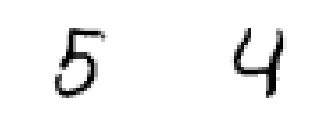

In [21]:
for i, image in enumerate([image1, image2]):
    plt.subplot(2, 2, i + 1)
    plt.axis('off')
    plt.imshow( (np.reshape(image, (28, 28)) * 255).astype(np.uint8), cmap=plt.cm.gray_r, interpolation='nearest')

Let us now use Tensorflow API to predict the numbers in these images

In [29]:
prediction = sess.run(predictor, feed_dict={x:[image1, image2], keep_prob: 1.})
print(sgl_predict)

[5 4]


The output above contains the numbers that is written in the images that were used for prediction. The matching of prediction result with the actual numbers in the image will vary based on the accuracy of the images.